# **Median (SimpleImputer)**

In [163]:
import seaborn as sns
import numpy as np
import pandas as pd
import random

In [164]:
df_mpg = sns.load_dataset('mpg')

In [165]:
df_mpg.dropna(inplace=True)

In [166]:
df_x = df_mpg.iloc[:,1:-2]

In [167]:
pd.DataFrame(df_x)

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82
394,4,97.0,52.0,2130,24.6,82
395,4,135.0,84.0,2295,11.6,82
396,4,120.0,79.0,2625,18.6,82


In [168]:
df_x.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
dtype: int64

In [169]:
print(len(df_x))

392


In [170]:
mvs = np.random.randint(0,392, size=30)

In [171]:
df_x.iloc[mvs]=np.nan

In [172]:
from sklearn.impute import SimpleImputer

In [173]:
sim_mean=SimpleImputer(strategy = 'mean')

In [174]:
sim_mean.fit(np.array(df_x))

SimpleImputer()

In [175]:
df_x_median = pd.DataFrame(sim_mean.transform(np.array(df_x)))

In [176]:
from sklearn.model_selection import train_test_split

df_x_median.reset_index(drop=True, inplace=True)
df_mpg['mpg'].reset_index(drop=True, inplace=True)

x_train1, x_test1, y_train1, y_test1 = train_test_split(df_x_median, df_mpg['mpg'], test_size=0.3, random_state=111)

In [177]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [178]:
fit_train1 = sm.OLS(y_train1, x_train1)

In [179]:
fit_train1=fit_train1.fit()

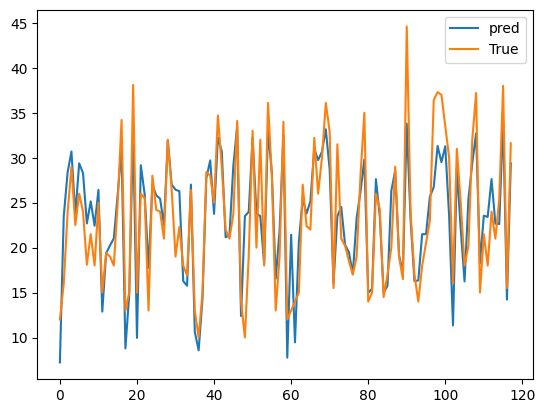

In [180]:
plt.plot(np.array(fit_train1.predict(x_test1)), label='pred')
plt.plot(np.array(y_test1), label='True')
plt.legend()
plt.show()

In [181]:
from sklearn.metrics import mean_squared_error

mse1_mean = mean_squared_error(y_true= y_test1, y_pred=fit_train1.predict(x_test1))
print(mse1_mean)

14.483611211352715


# **선형보간**

In [186]:
df_x_linear = df_x.interpolate(method='linear')

In [187]:
df_x_linear

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8.0,307.0,130.0,3504.0,12.0,70.0
1,8.0,350.0,165.0,3693.0,11.5,70.0
2,8.0,318.0,150.0,3436.0,11.0,70.0
3,8.0,304.0,150.0,3433.0,12.0,70.0
4,8.0,302.0,140.0,3449.0,10.5,70.0
...,...,...,...,...,...,...
393,4.0,140.0,86.0,2790.0,15.6,82.0
394,4.0,97.0,52.0,2130.0,24.6,82.0
395,4.0,135.0,84.0,2295.0,11.6,82.0
396,4.0,120.0,79.0,2625.0,18.6,82.0


In [188]:
df_x_linear.reset_index(drop=True, inplace=True)
df_mpg['mpg'].reset_index(drop=True, inplace=True)

x_train2, x_test2, y_train2, y_test2 = train_test_split(df_x_linear, df_mpg['mpg'], test_size=0.3, random_state=111)

In [189]:
fit_train2 = sm.OLS(y_train2, x_train2)
fit_train2=fit_train2.fit()

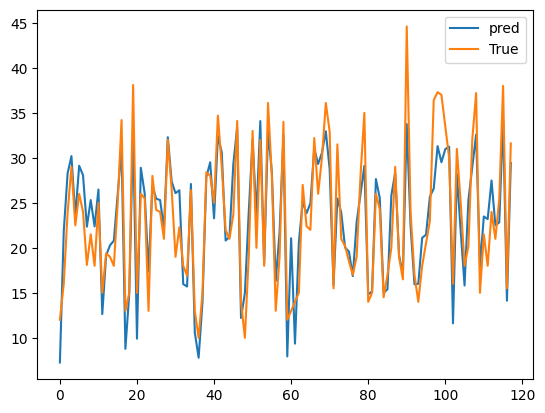

In [190]:
plt.plot(np.array(fit_train2.predict(x_test2)), label='pred')
plt.plot(np.array(y_test2), label='True')
plt.legend()
plt.show()

In [191]:
from sklearn.metrics import mean_squared_error

mse2_mean = mean_squared_error(y_true= y_test2, y_pred=fit_train2.predict(x_test2))
print(mse2_mean)

11.611439784483247


# **IterativeImputer**

In [192]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [193]:
imputer=IterativeImputer(imputation_order= 'descending', max_iter=10, random_state=111, n_nearest_features=3)

In [194]:
df_x_itr=pd.DataFrame(imputer.fit_transform(df_x))

In [195]:
df_x_itr

,0,1,2,3,4,5
0,8.000000,307.000000,130.000000,3504.000000,12.000000,70.000000
1,8.000000,350.000000,165.000000,3693.000000,11.500000,70.000000
2,8.000000,318.000000,150.000000,3436.000000,11.000000,70.000000
3,8.000000,304.000000,150.000000,3433.000000,12.000000,70.000000
4,8.000000,302.000000,140.000000,3449.000000,10.500000,70.000000
...,...,...,...,...,...,...
387,4.000000,140.000000,86.000000,2790.000000,15.600000,82.000000
388,4.000000,97.000000,52.000000,2130.000000,24.600000,82.000000
389,4.000000,135.000000,84.000000,2295.000000,11.600000,82.000000
390,4.000000,120.000000,79.000000,2625.000000,18.600000,82.000000


In [196]:
df_x_itr.reset_index(drop=True, inplace=True)
df_mpg['mpg'].reset_index(drop=True, inplace=True)

x_train3, x_test3, y_train3, y_test3 = train_test_split(df_x_itr, df_mpg['mpg'], test_size=0.3, random_state=111)

In [197]:
fit_train3 = sm.OLS(y_train3, x_train3)
fit_train3=fit_train3.fit()

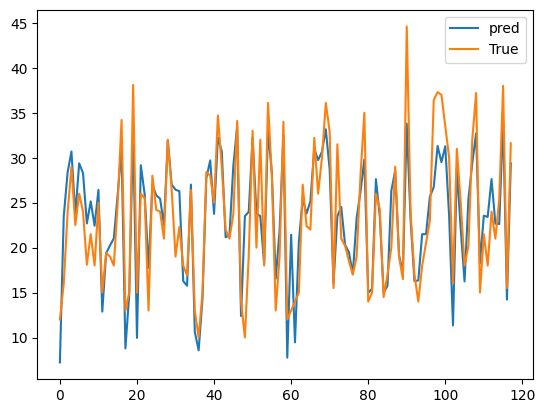

In [198]:
plt.plot(np.array(fit_train3.predict(x_test3)), label='pred')
plt.plot(np.array(y_test3), label='True')
plt.legend()
plt.show()

In [199]:
from sklearn.metrics import mean_squared_error

mse3_mean = mean_squared_error(y_true= y_test3, y_pred=fit_train3.predict(x_test3))
print(mse3_mean)

14.483611211352716


Median(SimpleImputer) : 14.483611211352715

선형보간 : 11.611439784483247

IterativeImputer : 14.483611211352716


# 총정리:
*선형보간법이* *제일* *적은* *MSE값을* *보여주며* *가장* *정확도가* *높은* *것으로* *나타났다*.

중앙값 대체의 경우, 결측치를 해당 column의 중앙값으로 대체하는 방법이기 때문에 데이터 사이의 규칙이나 흐름을 반영하기 보다는 값들 사이의 평균 값을 넣는 가장 단순한 방법입니다.
선형보간은 연속적인 데이터에 대하여 추세를 파악하여 값을 채우게 됩니다. 하지만 비선형적인 형태나 이상치에 대해서는 정확도가 낮아지게 됩니다.
Iterative Imputation은 다른 변수들을 사용하여 반복적으로 결측치를 추정하여 대입합니다.

해당 데이터의 경우 선형보간의 MSE값이 가장 좋게 나왔으므로 데이터가 전체적으로 선형적인 추세를 이루고 있을 가능성이 높음을 예상할 수 있습니다.